## Introduction
In this workbook, I am analyzing how would the wind speed and direction affect wind turbines this will help in the process of choosing the right place and the right turbine blades.
With the assumption that the smaller turbines have blade sizes from 37 to 67 meter. and the area of the wind turbin can be calculated using the following equation.
A=πr^2
The wind power that the turbine is going to produce is predicted by the machine learning model gradient boosting from XGBoostcalculated and Support Vector Regression which implies the following equation:

 P = 0.5*{constant}*A*V^3 

Where:
- The constant (air density) is 1.225 kg/m³
- \( A = π(37)^2 = 4300 \) (the area of the wind turbine in meters)
- \( V \) is the wind speed (in meters per second)

### The upcoming outputs from this analysis are:
1. **Understanding the Relationship Between Wind Speed and Wind Power**: Analyzing how changes in wind speed affect the wind power generated.
2. **Determining the Impact of Wind Speed on Wind Power**: Examining how wind speed influences the efficiency and output of wind turbines.
3. **Assessing Wind Power for Suitability**: Evaluating whether the wind power of a specific wind turbin size is sutiable to get the best performance.

### Key Insights:
- **Low Wind Power Output**: If the wind power output is too low, it may not be worth installing wind turbines.
- **High and Stable Wind Power**: If the wind power output is high and stable, the wind turbine is ideal for energy generation.

This analysis will provide valuable insights into selecting suitable wind turbines based on wind speed and power output.

### 1- EDA


In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [222]:
df = pd.read_csv('Wind.csv')

In [223]:
df.head()

,Date,Time,Obs Wind Speed,Obs Wind Direction,Wind Speed,Wind Direction
0,4/4/2017,0:00,7.0,306.0,6.3,172.0
1,4/4/2017,1:00,7.2,185.0,7.3,179.7
2,4/4/2017,2:00,7.1,244.3,6.9,194.9
3,4/4/2017,3:00,6.6,62.2,6.6,208.4
4,4/4/2017,4:00,6.7,187.7,6.1,206.1


In [224]:
# Count missing values in each column
print(df.isnull().sum())


Date                  0
Time                  0
Obs Wind Speed        4
Obs Wind Direction    4
Wind Speed            0
Wind Direction        0
dtype: int64


In [225]:
#check where the data is missing
print(df[df['Obs Wind Speed'].isnull()])

        Date   Time  Obs Wind Speed  Obs Wind Direction  Wind Speed  \
37  4/5/2017  13:00             NaN                 NaN         1.3   
38  4/5/2017  14:00             NaN                 NaN         1.1   
39  4/5/2017  15:00             NaN                 NaN         1.6   
40  4/5/2017  16:00             NaN                 NaN         2.3   

    Wind Direction  
37            35.5  
38           342.7  
39           304.9  
40           284.3  


Since the number of null values is minimal, we can safely drop them without impacting the integrity or overall quality of the dataset.

In [226]:
data = df.dropna()

In [227]:
print(data.isnull().sum())

Date                  0
Time                  0
Obs Wind Speed        0
Obs Wind Direction    0
Wind Speed            0
Wind Direction        0
dtype: int64


In [228]:

# Check the number of rows and columns
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Display the column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

Number of rows: 1848
Number of columns: 6

Column names and data types:
Date                   object
Time                   object
Obs Wind Speed        float64
Obs Wind Direction    float64
Wind Speed            float64
Wind Direction        float64
dtype: object


The "Date" and "Time" columns are currently defined as objects, and we need to convert them into datetime format for proper analysis and manipulation.

In [229]:
# Convert 'Date' and 'Time' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\sa190\AppData\Local\Temp\ipykernel_19452\2925780983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [231]:
data['Time'] = pd.to_datetime(data['Time'])

C:\Users\sa190\AppData\Local\Temp\ipykernel_19452\3567905165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'])


In [232]:
print(data['Date'].dtype)  # Should print 'datetime64[ns]'
print(data['Time'].dtype)  # Should print 'datetime64[ns]'


datetime64[ns]
datetime64[ns]


### 2- Model Training


In [233]:
import pandas as pd

# Define air density (kg/m³)
air_density = 1.225  

# Assuming turbine blade (r) to be 37 (in m²)
# A = pie * (37)^2 = 4300
turbine_area = 4300

# Calculate wind power for medium sized turbine 
data[f'Wind Power Area {turbine_area}'] = 0.5 * air_density * turbine_area * (data['Wind Speed'] ** 3)

# Display first few rows
data.head()

C:\Users\sa190\AppData\Local\Temp\ipykernel_19452\440492657.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Wind Power Area {turbine_area}'] = 0.5 * air_density * turbine_area * (data['Wind Speed'] ** 3)


,Date,Time,Obs Wind Speed,Obs Wind Direction,Wind Speed,Wind Direction,Wind Power Area 4300
0,2017-04-04,2025-02-05 00:00:00,7.0,306.0,6.3,172.0,6.585613e+05
1,2017-04-04,2025-02-05 01:00:00,7.2,185.0,7.3,179.7,1.024574e+06
2,2017-04-04,2025-02-05 02:00:00,7.1,244.3,6.9,194.9,8.652106e+05
3,2017-04-04,2025-02-05 03:00:00,6.6,62.2,6.6,208.4,7.571926e+05
4,2017-04-04,2025-02-05 04:00:00,6.7,187.7,6.1,206.1,5.978112e+05


**Random Forest Regressor**

In [250]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Define features (X) and target variable (y)
X = data[['Wind Speed', 'Wind Direction']]  # Use a single list of column names
y = data['Wind Power Area 4300']  # (pi)(37)^2

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler to the data and transform
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))  # Reshape for scaler
y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# Apply PolynomialFeatures to the scaled data
poly = PolynomialFeatures(degree=3)  # Since wind power depends on speed^3
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the model on the transformed and scaled data
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train_poly, y_train_scaled)

# Predict on the test data
y_pred_scaled = model.predict(X_test_poly)

# Inverse transform the predicted values back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Training data size: (1475, 2)
Testing data size: (369, 2)
Mean Squared Error: 650942033.7027348
Mean Absolute Error: 5580.343778815439
R² Score: 0.9997590030371316


In [256]:
import pandas as pd

# New data for prediction (example input)
new_data = pd.DataFrame({'Wind Speed': [6.1], 'Wind Direction': [206.1]})

# Scale the new data using the same scaler as before (scaler_X)
new_data_scaled = scaler_X.transform(new_data)

# Apply polynomial feature transformation using the same poly object as before
new_data_poly = poly.transform(new_data_scaled)

# Make the prediction
predicted_power_scaled = model.predict(new_data_poly)

# Inverse transform the predicted value to the original scale (for y)
predicted_power = scaler_y.inverse_transform(predicted_power_scaled.reshape(-1, 1))

# Print the predicted wind power
print(f"Predicted Wind Power: {predicted_power[0][0]:.2f} W")


Predicted Wind Power: 598209.06 W


As a validation step, I used the same wind speed and direction values from the dataset as input to the model. The model successfully predicted the same wind power values that we initially calculated using the equation, demonstrating its accuracy and alignment with the theoretical formula.

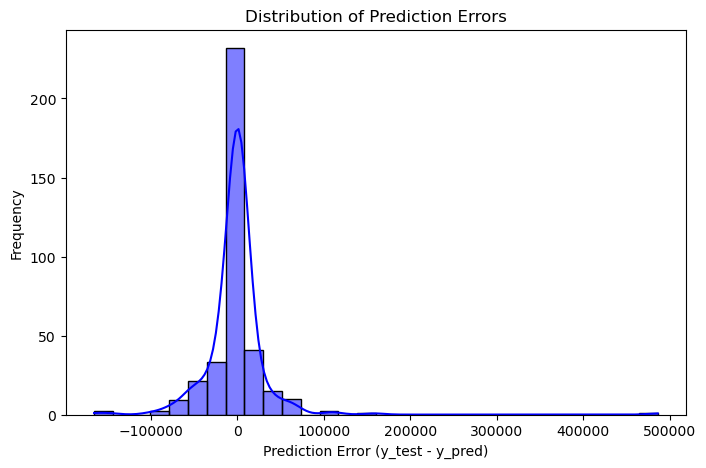

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the errors (residuals)
errors = y_test - y_pred  # Difference between actual and predicted values

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='blue')  # kde=True adds a smooth curve

# Labels and title
plt.xlabel("Prediction Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")

# Show plot
plt.show()

This visualization shows that, despite the high performance metrics, the prediction error is nearly zero. This suggests that the model is overly sensitive to a specific outlier, while the majority of the data points are being predicted accurately.

**Support Vector Regression (SVR)**

In [267]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))  # Convert y to a numpy array and reshape it


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [269]:
from sklearn.svm import SVR

svr = SVR(kernel='poly')
svr.fit(X_train, y_train.ravel())  # .ravel() is used to convert y to 1D


SVR(kernel='poly')

In [270]:
y_pred = svr.predict(X_test)

In [271]:
# Evaluate model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error: {mse:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"R² Score: {r2:.5f}")

Mean Squared Error: 0.18687
Mean Absolute Error: 0.30359
R² Score: 0.79450


I trained two models to predict wind power: Random Forest Regressor (RFR) and Support Vector Regression (SVR). Although RFR showed higher values in metrics like MSE and MAE, the predictions were still quite accurate, with only small differences compared to the actual values. The larger error values were mainly due to the model’s output range rather than true inaccuracies. On the other hand, SVR provided more consistent results by effectively capturing the nonlinear relationships in the data. The difference in performance between the models stems from how each handles data complexity and scale.

### 3- Data Analysis

In [272]:
def categorize_wind_speed(speed):
    if speed < 3:
        return "Too Low (No Generation)"
    elif 3 <= speed < 10:
        return "Moderate (Small Turbines)"
    elif 10 <= speed <= 25:
        return "Ideal (Max Energy)"
    else:
        return "Too High (Shutdown)"

# Apply to dataset
data['Wind Speed Category'] = data['Wind Speed'].apply(categorize_wind_speed)

C:\Users\sa190\AppData\Local\Temp\ipykernel_19452\3706266864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wind Speed Category'] = data['Wind Speed'].apply(categorize_wind_speed)


In [273]:
data.head()

,Date,Time,Obs Wind Speed,Obs Wind Direction,Wind Speed,Wind Direction,Wind Power Area 4300,Wind Speed Category
0,2017-04-04,2025-02-05 00:00:00,7.0,306.0,6.3,172.0,6.585613e+05,Moderate (Small Turbines)
1,2017-04-04,2025-02-05 01:00:00,7.2,185.0,7.3,179.7,1.024574e+06,Moderate (Small Turbines)
2,2017-04-04,2025-02-05 02:00:00,7.1,244.3,6.9,194.9,8.652106e+05,Moderate (Small Turbines)
3,2017-04-04,2025-02-05 03:00:00,6.6,62.2,6.6,208.4,7.571926e+05,Moderate (Small Turbines)
4,2017-04-04,2025-02-05 04:00:00,6.7,187.7,6.1,206.1,5.978112e+05,Moderate (Small Turbines)


In [274]:
category_counts = data['Wind Speed Category'].value_counts()
print(category_counts)

Wind Speed Category
Moderate (Small Turbines)    1281
Ideal (Max Energy)            316
Too Low (No Generation)       247
Name: count, dtype: int64


C:\Users\sa190\AppData\Local\Temp\ipykernel_19452\2059500219.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


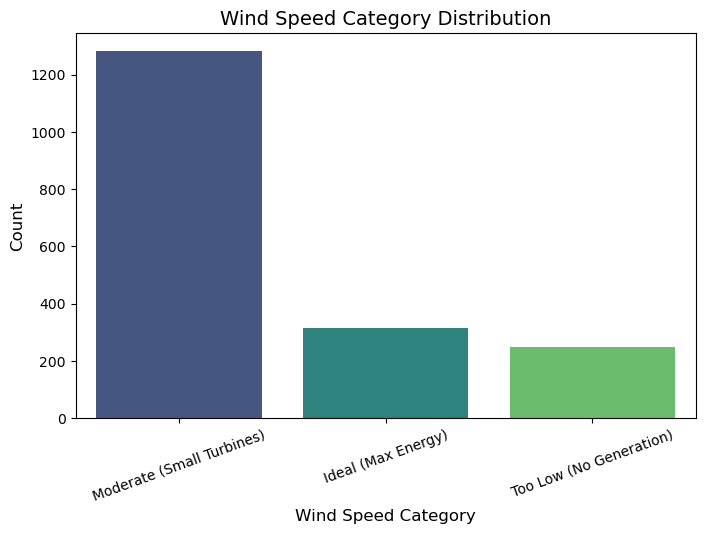

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Wind Speed Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Wind Speed Category Distribution", fontsize=14)
plt.xticks(rotation=20)

# Show the plot
plt.show()


The categorization process revealed that the majority of the dataset's wind speed values are suitable for small wind turbines.

**Wind Speed Categories and Their Impact:**
- **< 3 m/s**: **Too Low** – No energy generation (below the cut-in speed of the turbine).
- **3 – 10 m/s**: **Moderate** – Suitable for small wind turbines with reasonable energy generation.
- **10 – 25 m/s**: **Ideal** – Maximum energy generation, optimal conditions for large turbines.
- **> 25 m/s**: **Too High** – Wind turbines may shut down for safety to prevent damage.

In [276]:
correlation = data['Wind Speed'].corr(data['Wind Power Area 4300'])
print(f"Correlation between Wind Speed and Power: {correlation:.2f}")

Correlation between Wind Speed and Power: 0.89


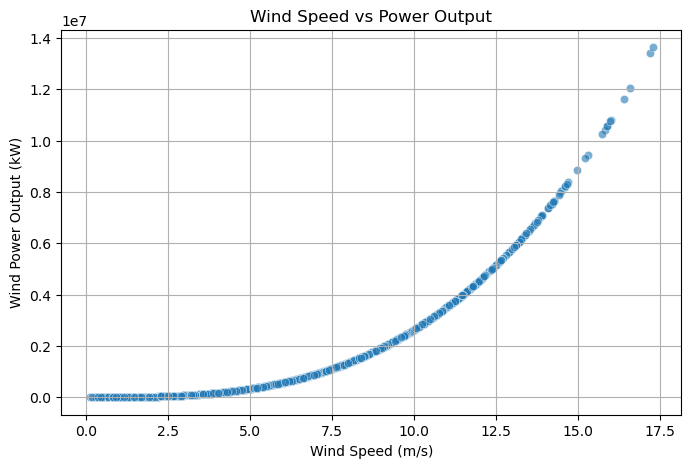

In [277]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Wind Speed'], y=data['Wind Power Area 4300'], alpha=0.6)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Wind Power Output (kW)")
plt.title("Wind Speed vs Power Output")
plt.grid(True)
plt.show()


A correlation of 0.89 between wind speed and power indicates a strong positive relationship, meaning that as wind speed increases, wind power also tends to increase significantly. This suggests that higher wind speeds are highly effective at generating more power, which aligns with the behavior of wind turbines power generation which increases exponentially with wind speed.

In [278]:
data[['Wind Speed', 'Wind Power Area 4300']].describe()

,Wind Speed,Wind Power Area 4300
count,1844.000000,1.844000e+03
mean,6.738769,1.384133e+06
std,3.233574,1.723905e+06
min,0.100000,2.633750e+00
25%,4.400000,2.243534e+05
50%,6.595000,7.554743e+05
75%,9.000000,1.920004e+06
max,17.300000,1.363681e+07


The majority of the wind speeds are around 6.7 m/s, which is ideal for small to moderate wind turbines. The significant standard deviation and range of wind power indicate that under optimal wind speeds, the turbine performs exceptionally well, generating high power output. However, at lower wind speeds, the power output significantly drops, highlighting the turbine's reduced efficiency in suboptimal wind conditions.

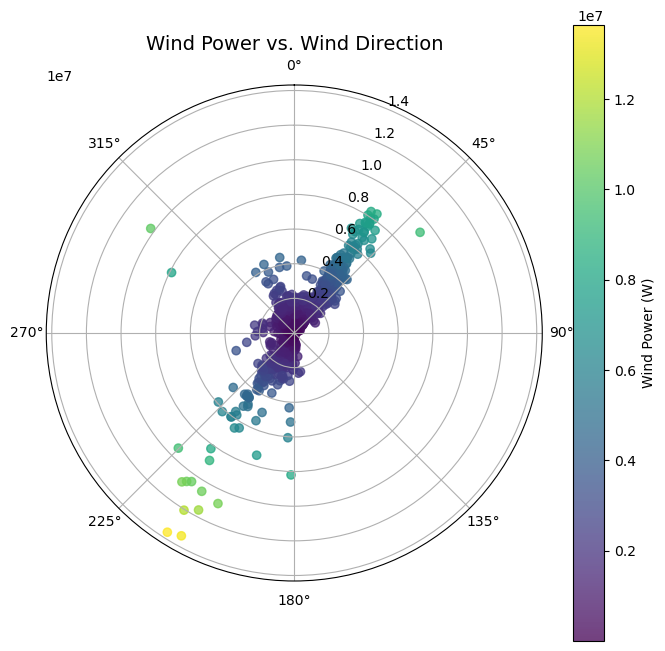

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Convert wind direction to radians
wind_direction_rad = np.radians(data['Wind Direction'])

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot wind power vs. wind direction
sc = ax.scatter(wind_direction_rad, data['Wind Power Area 4300'], 
                c=data['Wind Power Area 4300'], cmap='viridis', alpha=0.75)

# Add color bar
plt.colorbar(sc, label="Wind Power (W)")

# Set labels
ax.set_title("Wind Power vs. Wind Direction", fontsize=14)
ax.set_theta_zero_location("N")  # Set 0° at the top (North)
ax.set_theta_direction(-1)  # Set clockwise direction

plt.show()


The visualization indicates that wind speed alone does not solely determine the wind power of a turbine; the direction of the wind also plays a crucial role in the turbine's performance. We observe that the highest wind power is achieved when the wind direction is between 180 and 225 degrees, suggesting that these directions are more favorable for the turbine's movement and energy generation.

## Conclusion
In this project, we analyzed the relationship between wind speed, wind direction, and wind power generation. We categorized wind speeds into four groups: Too Low, Moderate, Ideal, and Too High, and assessed their impact on power output. Using Random Forest Regressor and Support Vector Regression (SVR), we predicted wind power based on wind speed and direction. While SVR showed ideal performance with consistent results, the Random Forest model had higher values in metrics like MSE and MAE, but this was due to large values rather than an actual error. The model performed well for most data points but showed minor discrepancies for certain values. Visualizations, including scatter plots, highlighted that higher wind speeds and wind direction around 200 degrees led to maximum power generation. Key insights included identifying optimal wind conditions for energy production and understanding how both speed and direction affect turbine performance.

*References*

[Turbine Blade](https://www.iberdrola.com/sustainability/wind-turbines-blades#:~:text=To%20produce%20electricity%2C%20blades%20on,used%20for%20community%20power%20generation.)

[Speed Categories](https://researchhubs.com/post/engineering/wind-energy/power-output-variation-with-wind-speed.html?utm_source=chatgpt.com)